### Logistic Regression Exercise

In [1]:
# import numpy
import numpy as np

# import linear_model and datasets from sklearn
from sklearn import linear_model, datasets

# import GridSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

In [96]:
# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

* print the shape of X

In [3]:
X.shape

(150, 4)

* print y

In [4]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
np.bincount(y)

array([50, 50, 50], dtype=int64)

* create a logistic regression model
    - **Note:** Spend some time on the logistic regression documentation to get familiar with the available parameters.

In [55]:
lr = linear_model.LogisticRegression(random_state=786,max_iter=1000)

In [45]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

* create a regularization space for the **'penalty'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [47]:
regspace3= {'penalty':['none','l2','l1','elasticnet']}

* create a regularization space for the **'c'** parameter (a.k.a. what values do we want to insert into our GridSearch?)

In [48]:
regspace3['C']=[0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0,10000.0]

* create a hyperparameter options dictionary

In [49]:
regspace3['multi_class']=['ovr','multinomial']

In [50]:
regspace3=[regspace3]

* create a grid search using 5-fold cross validation

In [56]:
clf = GridSearchCV(estimator=lr, param_grid=regspace3, n_jobs=-1)


* fit the grid search

In [57]:
res=clf.fit(X, y)   

C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.96       0.69333333        nan        nan 0.97333333 0.71333333
        nan        nan 0.96       0.71333333        nan        nan
 0.97333333 0.74              nan        nan 0.96       0.79333333
        nan        nan 0.97333333 0.86              nan        nan
 0.96       0.88666667        nan        nan 0.97333333 0.94666667
        nan        nan 0.96       0.94              nan        nan
 0.97333333 0.97333333        nan        nan 0.96       0.96
        nan        nan 0.97333333 0.97333333        nan        nan
 0.96       0.96              nan        nan 0.97333333 0.98
        nan        nan 0.96       0.96              nan        nan
 0.97333333 0.97333333        nan        nan 0.96       0.96
        nan        nan 0.97333333 0.97333333        nan        nan]
  warnings.warn(


* take the best model from grid search

In [58]:
res.best_estimator_

LogisticRegression(C=100.0, max_iter=1000, multi_class='multinomial',
                   random_state=786)

In [60]:
res.best_score_

0.9800000000000001

* print the best hyperparameters

In [59]:
res.best_params_

{'C': 100.0, 'multi_class': 'multinomial', 'penalty': 'l2'}

* predict the target vector
    - class ( *predict* )
    - probabilities ( *predict_proba* )

In [61]:
clf.predict(X[:2, :])

array([0, 0])

In [62]:
clf.predict_proba(X[:2,:])

array([[9.99696476e-01, 3.03524327e-04, 1.54379999e-23],
       [9.99062763e-01, 9.37237140e-04, 6.51895742e-22]])

In [63]:
clf.score(X,y)

0.98

- plot the ROC curve and print the AUC

In [86]:
from sklearn.metrics import roc_curve, auc

In [82]:
y_lr=linear_model.LogisticRegression(C=100.0, max_iter=1000, multi_class='multinomial',random_state=786).fit(X,y).decision_function(X)

In [84]:
from sklearn.preprocessing import label_binarize
# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

In [87]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i],_= roc_curve(y[:, i], y_lr[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_lr.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [92]:
print(fpr)
print()
print(tpr)
print()
print(roc_auc)

{0: array([0.  , 0.  , 0.  , 0.6 , 0.62, 1.  ]), 1: array([0.  , 0.01, 0.5 , 0.5 , 0.51, 0.51, 0.52, 0.52, 0.53, 0.53, 0.54,
       0.54, 0.55, 0.55, 0.56, 0.56, 0.58, 0.58, 0.67, 0.67, 0.79, 0.81,
       1.  ]), 2: array([0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 1.  ]), 'micro': array([0.        , 0.        , 0.        , 0.00333333, 0.00333333,
       0.01      , 0.01      , 0.01333333, 0.01333333, 0.07666667,
       0.07666667, 0.12      , 0.12      , 0.12333333, 0.12333333,
       0.13      , 0.13      , 0.14333333, 0.14333333, 0.15666667,
       0.15666667, 0.16333333, 0.16333333, 0.16666667, 0.16666667,
       0.16666667, 0.16666667, 0.17      , 0.17      , 0.17333333,
       0.17333333, 0.17666667, 0.17666667, 0.18      , 0.18      ,
       0.18333333, 0.18333333, 0.18666667, 0.18666667, 0.19      ,
       0.19      , 0.19333333, 0.19333333, 0.19666667, 0.19666667,
       0.23666667, 0.23666667, 0.28333333, 0.29      , 0.7       ,
       0.70666667, 1.        ])}

{0: array([0. 

In [89]:
import matplotlib.pyplot as plt

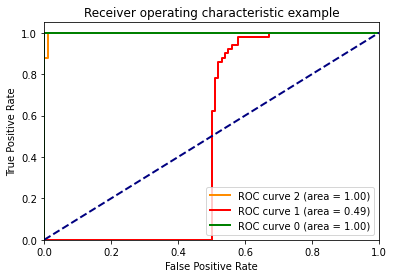

In [91]:
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve 2 (area = %0.2f)" % roc_auc[2],
)
plt.plot(
    fpr[1],
    tpr[1],
    color="red",
    lw=lw,
    label="ROC curve 1 (area = %0.2f)" % roc_auc[1],
)
plt.plot(
    fpr[0],
    tpr[0],
    color="green",
    lw=lw,
    label="ROC curve 0 (area = %0.2f)" % roc_auc[0],
)

plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

* print the Logreg coeficients

In [94]:
lr_coeff=linear_model.LogisticRegression(C=100.0, max_iter=1000, multi_class='multinomial',random_state=786)

In [97]:
lr_coeff.fit(X,y).coef_

array([[-0.39955028,  3.40768373, -6.40577647, -3.510532  ],
       [ 1.3608868 ,  0.44729154, -0.5118558 , -4.41112122],
       [-0.96133652, -3.85497528,  6.91763227,  7.92165322]])

* print the Logreg intercepts

In [98]:
lr_coeff.fit(X,y).intercept_

array([ 19.98922412,   5.20125137, -25.19047549])